<a href="https://colab.research.google.com/github/kfukutom/cmplxsys335/blob/main/kfukutom_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1 Degree distribution for class network

1a) Write a program to read the two files and assemble the network as a NetworkX DiGraph.
Then convert the directed network into an undirected one, such that if two nodes are connected by an edge in either direction (or both) in the directed network then they are connected by an edge in the undirected network.

In [202]:
# load and ensure the .csv and .txt file are properly read
from numpy import loadtxt, sum, zeros, ones, empty, array, mean
from csv import reader
import networkx as nx
from pylab import plot, hist, xscale, yscale
from networkx.drawing.nx_pydot import pydot_layout
import matplotlib.pyplot as plt

In [203]:
def readtxt(file):
    G = nx.read_adjlist(file, nodetype=int, create_using=nx.DiGraph)

    return G


def readcsv(file):
    with open(file, 'r') as csvfile:
        r = reader(csvfile)
        ls = []

        for students in r:
            students[0] = int(students[0])
            ls.append(students)

    return ls


def conversion(G):
    return G.to_undirected()

# Arg: Graph input, then we'll call on it's respective feature .degree(index)
def sizing(G):
    degrees = [100 * G.degree(i) for i in G]
    return degrees

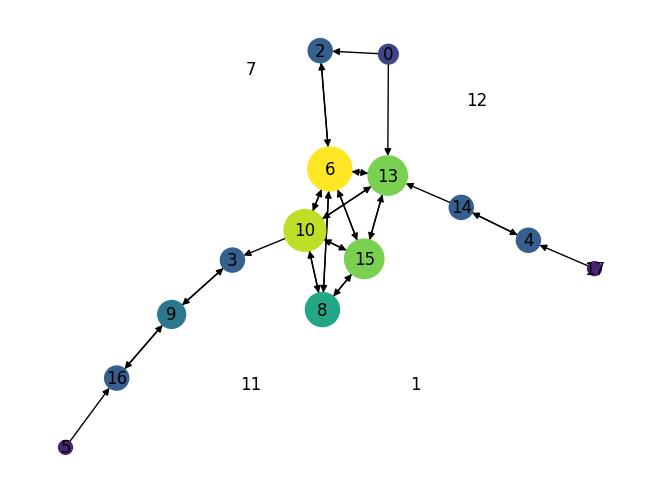

In [204]:
DiGraph = readtxt('classnet.txt')
lst = readcsv('classnames.csv')
sizes = sizing(DiGraph)
p = pydot_layout(DiGraph)
nx.draw(DiGraph, node_size=sizes, pos=p, with_labels=True, node_color=sizes)


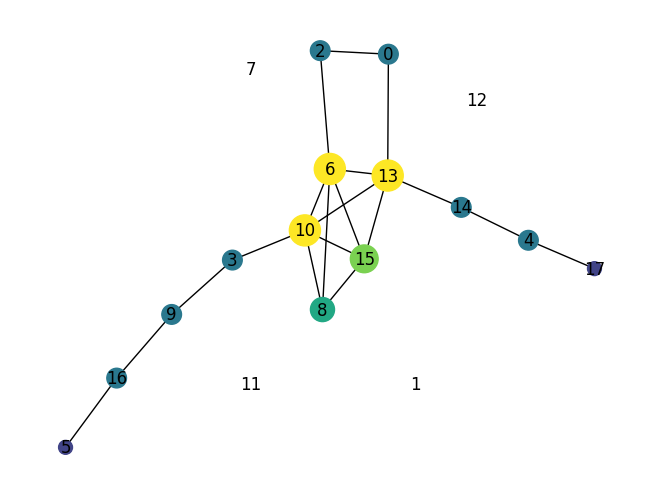

In [205]:
UndiGraph = conversion(DiGraph)
sizes = sizing(UndiGraph)
p = pydot_layout(UndiGraph)
nx.draw(UndiGraph, node_size=sizes, pos=p, with_labels=True, node_color=sizes)

1b) Add code to make a graph of the histogram of node degrees—the degree distribution of the
network.

We could assume that most people know around 1 to 3 people in the class.


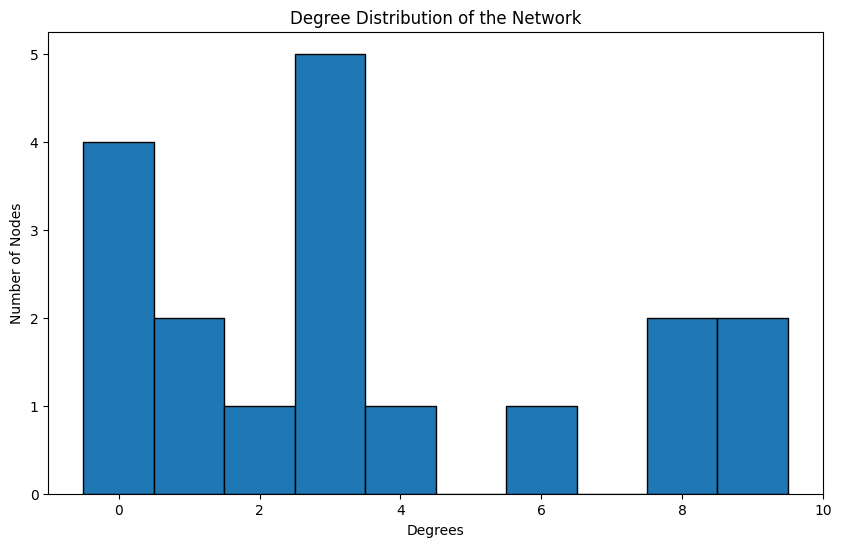

In [206]:
# start of 1b
degrees = [degree for node, degree in DiGraph.degree]
plt.figure(figsize=(10, 6))
hist(degrees, align='left', edgecolor='black')
plt.title('Degree Distribution of the Network')
plt.xlabel('Degrees')
plt.ylabel('Number of Nodes')
print('We could assume that most people know around 1 to 3 people in the class.')

1c) Make a new version of the program that does a visualization of the network with node size proportional to degree plus 1.
Why degree plus 1? What could go wrong if sizes were just proportional to degree?

Adding 1 to each degree ensures that even isolated nodes are still visible on the graph, preventing them from being disregarded from the diagram entirely.


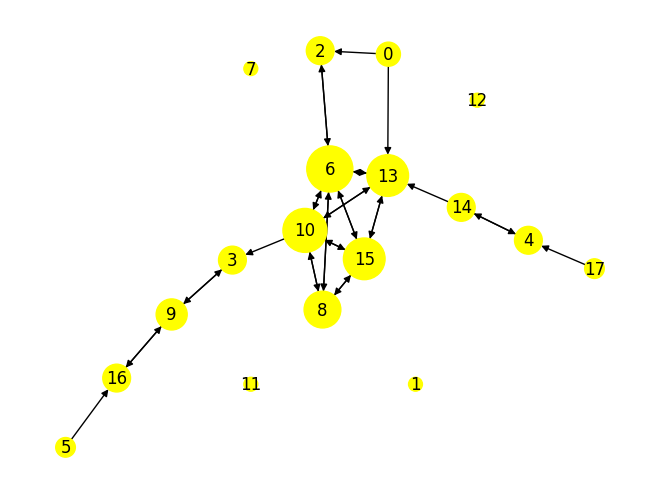

In [207]:
# Proportional to Degree Size + 1
G = readtxt('classnet.txt')

def proportional(G):
  degrees = [degree for node, degree in G.degree()]
  sizes = [(degree + 1) * 100 for degree in degrees]
  p = pydot_layout(G)
  nx.draw(G, p, with_labels=True, node_size=sizes, node_color='yellow')

proportional(G)
print("Adding 1 to each degree ensures that even isolated nodes are still visible on the graph, preventing them from being disregarded from the diagram entirely.")

1d) Make a **third** version that produces a visualization of the directed network with node size
proportional to in-degree

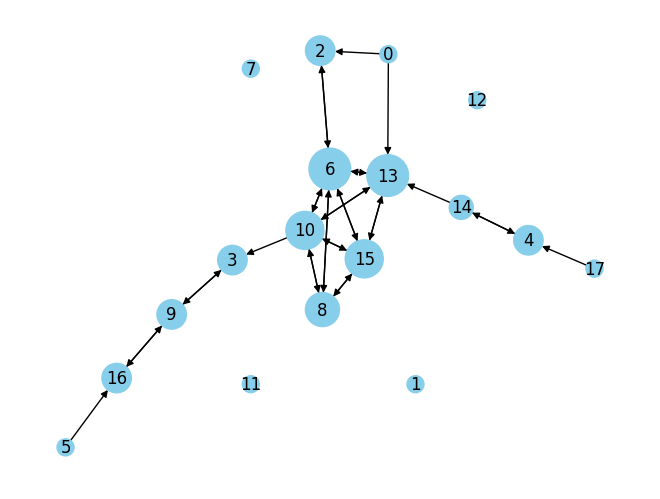

In [208]:
def inGraph(G):
  in_degrees = [G.in_degree(node) for node in G.nodes()]
  sizes = [(i + 1) * 150 for i in in_degrees]
  p = pydot_layout(G)
  nx.draw(G, p, with_labels=True, node_size=sizes, node_color='skyblue')

inGraph(G)

#2 Long-tailed distributions

2a) Write a program to read the Internet network, find the degrees of all its nodes, and then make a graph of the cumulative distribution of degrees for this network, with logarithmic
scales on both axes.

In [209]:
# Helper Function, 2a
def cumulative(data):
    cumulative_sum = []
    total = 0

    for value in reversed(data):
        total += value
        cumulative_sum.append(total)

    return list(reversed(cumulative_sum))

Text(0.5, 1.0, "Question 2A: 'internet.txt' Degree Distribution")

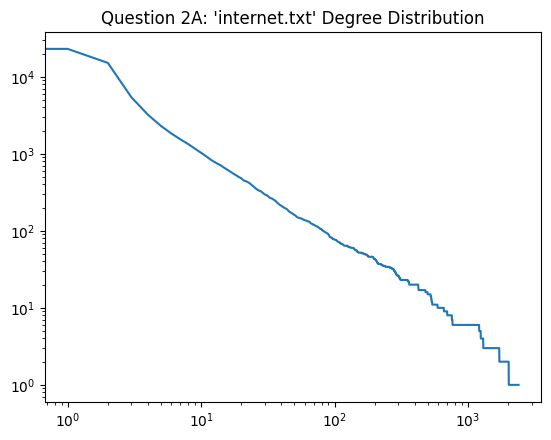

In [210]:
G = nx.read_adjlist('internet.txt', nodetype=int)
degrees = [degree for node, degree in G.degree]

max_degree = max(degrees)
degree_count = zeros(max_degree + 1, dtype=int)

for degree in degrees:
    degree_count[degree] += 1
cumulative_distribution = cumulative(degree_count)

plot(cumulative_distribution)
xscale('log')
yscale('log')
plt.title("Question 2A: 'internet.txt' Degree Distribution")

2b) Extend your program to read in each of the other three files in turn and make plots (again
on log scales) of the cumulative distributions of words in Moby Dick, surname frequency,
and wealth. The output of your program should be single plot with four graphs arranged
2-by-2. Hint: You may wish to read up about the subplot function in pylab.

<ipython-input-211-9212651f0921>:61: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  cumulative_freq = [sum(count >= i for count in freq.values()) for i in counts]
<ipython-input-211-9212651f0921>:81: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  cumulative_freq = [sum(count >= i for count in freq.values()) for i in counts]


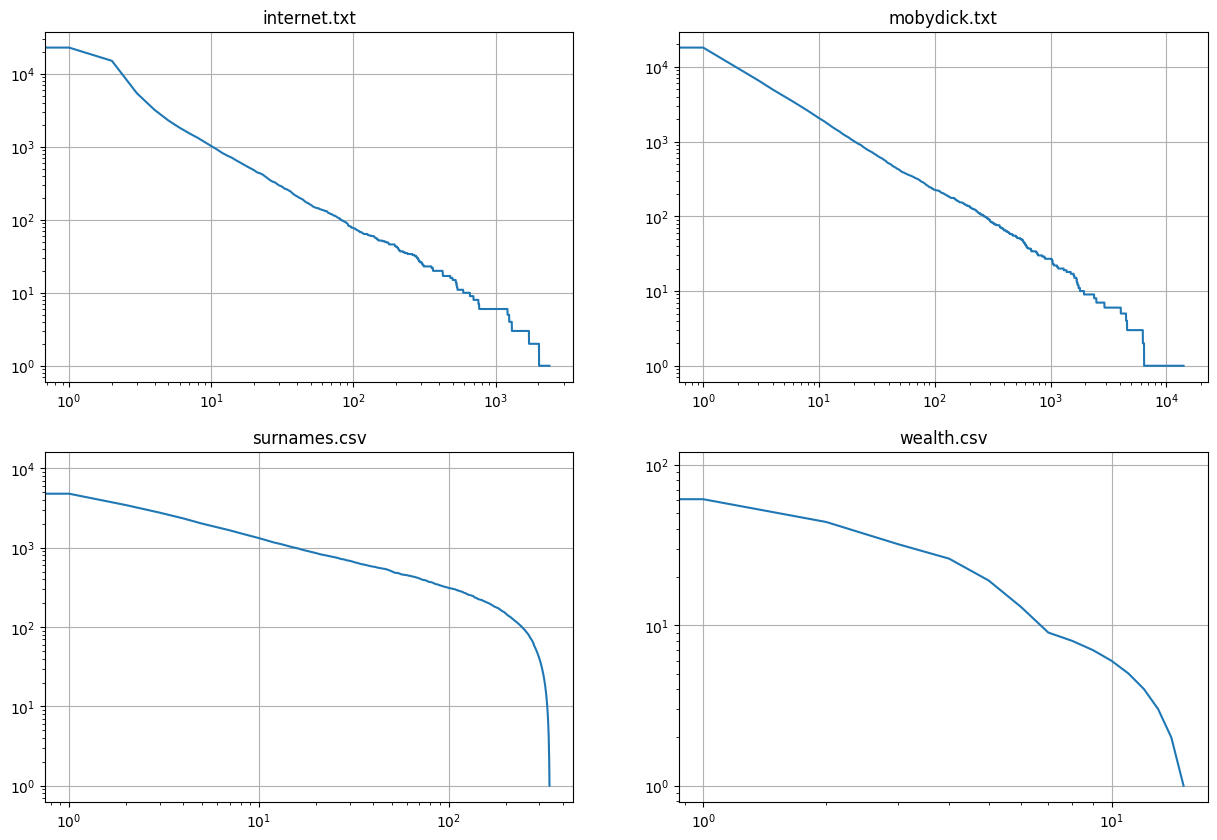

In [211]:
#2b
from pylab import subplot
plt.figure(figsize=(15, 10))

# internet.txt
subplot(2,2,1)
G = nx.read_adjlist('internet.txt', nodetype=int)
degrees = [degree for node, degree in G.degree]

max_degree = max(degrees)
degree_count = zeros(max_degree + 1, dtype=int)

for degree in degrees:
    degree_count[degree] += 1
cumulative_distribution = cumulative(degree_count)

plot(cumulative_distribution)
xscale('log')
yscale('log')
plt.title("internet.txt")
plt.grid(True)

# mobydick.txt
subplot(2,2,2)
freq = []

with open('mobydick.txt', 'r') as file:
  for line in file:
    word, count = line.strip().split()
    freq.append(int(count))
file.close()

max_freq = max(freq)
dist = zeros(max_freq+1, dtype=int)

# Passively iterate through the frequency <list> object
for word in freq:
  dist[word] += 1
cumulative_freq = cumulative(dist)

plot(cumulative_freq)
xscale('log')
yscale('log')
plt.title("mobydick.txt")
plt.grid(True)

#surnames.csv
subplot(2,2,3)

file = reader(open("surnames.csv", "r"))
values = [int(row[1]) for row in file]

freq = {}
for i in values:
    if i not in freq:
        freq[i] = 0
    freq[i] += 1

# gets unique elements utilizing keys [index, 0]
counts = sorted(set(freq.values()))
cumulative_freq = [sum(count >= i for count in freq.values()) for i in counts]

plot(cumulative_freq)
xscale('log')
yscale('log')
plt.title('surnames.csv')
plt.grid(True)

# wealth.csv
subplot(2,2,4)
wealth = reader(open("wealth.csv", "r"))
values = [int(row[0]) for row in wealth]

freq = {}
for value in values:
    if value not in freq:
        freq[value] = 0
    freq[value] += 1

counts = sorted(set(freq.values()))
cumulative_freq = [sum(count >= i for count in freq.values()) for i in counts]

plot(cumulative_freq)
xscale('log')
yscale('log')
plt.title('wealth.csv')
plt.grid(True)

2c) If you have done the previous part right, you should get four plots that look a lot like power law distributions. Make a rough estimate of the exponent for each one, by estimating the
slope of the plot.

2d) For each plot, what (roughly) is the lower cutoff below which the power-law behavior does not hold?

*   ***internet.txt***: I would say that the lower cutoff would around 10^1 | 10, as it shows the general flattening of the curve beyond that deviating point.

*   ***mobydick.txt***: Estimate cutoff would be somewhere around


2e) Write a new version of your program that calculates the exponent of each power law using the Hill estimator. How do the results compare with your rough estimates from part (c).

> **To calculate the power-law exponent(alpha), we use the following formula:**


$$
\alpha = 1 + N \left[ \sum_{i} \ln \frac{k_i}{k_{\text{min}} - \frac{1}{2}} \right]^{-1}
$$

In [238]:
# Hill Estimator Formula, above in LaTex format...
from numpy import log

# Pass by kmin and data as required args:
from math import log

def hill_estimator(data, k_min):
    filtered_data = [x for x in data if x >= k_min]
    N = len(filtered_data)

    if N == 0:
        return 0

    base = sum(log(x / (k_min - (1/2))) for x in data)
    alpha = 1 + (N / base) if base != 0 else 0
    return alpha

# internet.txt
G = nx.read_adjlist('internet.txt', nodetype=int)
degrees = [degree for node, degree in G.degree()]
k_min = min(degrees)
alpha = hill_estimator(degrees, k_min)
print(f"Hill Estimator output for internet.txt: {alpha:.3f}\n")



# mobydick.txt
freq = []
with open('mobydick.txt', 'r') as file:
  for line in file:
    word, count = line.strip().split()
    freq.append(int(count))
file.close()
k_min = min(freq)

alpha = hill_estimator(freq, k_min)
print(f"Hill Estimator output for mobydick.txt: {alpha:.3f}\n")



# surnames.csv
file = reader(open("surnames.csv", "r"))
values = [int(row[1]) for row in file]
k_min = min(values)

alpha = hill_estimator(values, k_min)
print(f"Hill Estimator output for surnames.csv: {alpha:.3f}\n")



# wealth.csv
wealth = reader(open("wealth.csv", "r"))
values = [int(row[0]) for row in wealth]
k_min = min(values)

alpha = hill_estimator(values, k_min)
print(f"Hill Estimator output for wealth.csv: {alpha:.3f}\n")


<ipython-input-238-a48b1b6a0473>:14: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  base = sum(log(x / (k_min - (1/2))) for x in data)


Hill Estimator output for internet.txt: 1.719

Hill Estimator output for mobydick.txt: 1.644

Hill Estimator output for surnames.csv: 1.816

Hill Estimator output for wealth.csv: 2.092



2f) What is the equivalent for surnames of the 80–20 law? That is, among the most common surnames, what percentage of names cover 80% of the population?

In [252]:
file = reader(open("surnames.csv", "r"))
values = [int(row[1]) for row in file]

total = sum(values)
target = (total * 0.8)
count, cumulative_sum = 0, 0

for value in values:
    cumulative_sum += value
    count += 1
    if cumulative_sum >= target:
        break

print(f"Percentage: {(count / len(values)):.5f} or {(count / len(values)) * 100:.3f}%")

Percentage: 0.08735 or 8.735%


#3 Centrality measures for class network

3a) Compute the eigenvector centrality for all nodes in the undirected version of the network,
from first principles using the power method (i.e., not using the function in NetworkX).

In [212]:
# Eigenvector Centrality
# Requires: classnet.txt, classnames.csv

# Remeber Kappa = (1/n) * (Sum of x-sub(i))
# Step 1: READ THE FILE
G = nx.read_adjlist('classnet.txt', nodetype=int)

# Step 2: Calculate Eigenvector Centrality
# ASSUME an initial guess (e.g., 1) and then each person will guess their scores, normalizing it eventually.
n = G.number_of_nodes()
A = ones(n, float)

for i in range(25):
  x_prime = zeros(n, float)

  for node in G:
    for neighbor in G[node]:
       # G[x] is a dictionary, and it contains neighbors
       x_prime[node] += A[neighbor]

  # Let's normalize the eigenvector centrality after each iteration
  kappa = mean(x_prime)
  A = x_prime / kappa


r = reader(open('classnames.csv', 'r'))
names = []
for data in r:
  names.append(data[0:3])

for i in G:
  print(names[i], "||", A[i], "||")
#print(max(A), min(A))

['0', 'Beyer', 'Kurt'] || 0.9604443406193051 ||
['2', 'Fu', 'Yujian'] || 1.026906402769105 ||
['13', 'Tian', 'Rongxuan'] || 2.7160208990105406 ||
['1', 'Doyle', 'James'] || 0.0 ||
['6', 'Kluge', 'James'] || 3.0414892412071928 ||
['3', 'Guo', 'Michael'] || 0.8287814609827372 ||
['9', 'Shah', 'Priya'] || 0.22879415973634384 ||
['4', 'Jiang', 'Michael'] || 0.20595866240235222 ||
['14', 'Truntaev', 'Kirill'] || 0.7497871217758125 ||
['5', 'Keaney', 'Nora'] || 0.016126780298557467 ||
['16', 'Voit', 'Angela'] || 0.0628473479404109 ||
['8', 'Rockmore', 'Shayna'] || 2.277171034535251 ||
['10', 'Steller', 'Cheops'] || 3.0010315185212173 ||
['15', 'Vlasceanu', 'Denisa'] || 2.8317915588821747 ||
['7', 'Maendel', 'Gavin'] || 0.0 ||
['11', 'Szentgyorgyi', 'Lucas'] || 0.0 ||
['12', 'Tamura', 'Himari'] || 0.0 ||
['17', 'Yao', 'Tianyong'] || 0.05284947131900019 ||


3b) Compute **PageRank** (with 𝛼 = 0.85) for all nodes in the directed version from first principles
(not using the function in NetworkX).

In [213]:
# PageRank, VERY Interesting Search Engine Algorithmn by Mr. Larry Page himself.

G = nx.read_adjlist("classnet.txt", nodetype=int, create_using=DiGraph)
N = G.number_of_nodes()
A = ones(N, float)
ALPHA = 0.85 # <-- Functions as a damping factor

for i in range(25):
    x_prime = zeros(N, float)

    for node in G:
        s = 0

        for neighbor in G.predecessors(node):
            out_degree = G.out_degree(neighbor)
            if out_degree > 0:

                s += A[neighbor] / out_degree

        x_prime[node] = (ALPHA * s + 1)

    A = x_prime

for i in G:
  print(names[i], "||", A[i])

#print(ALPHA, " ", N)

['0', 'Beyer', 'Kurt'] || 1.0
['2', 'Fu', 'Yujian'] || 3.3421622168324427
['13', 'Tian', 'Rongxuan'] || 8.37473314091832
['1', 'Doyle', 'James'] || 1.0
['6', 'Kluge', 'James'] || 11.293761148637145
['3', 'Guo', 'Michael'] || 9.45806488828903
['9', 'Shah', 'Priya'] || 16.445275077931157
['4', 'Jiang', 'Michael'] || 3.561637480074149
['14', 'Truntaev', 'Kirill'] || 4.027386504740868
['5', 'Keaney', 'Nora'] || 1.0
['16', 'Voit', 'Angela'] || 8.802826001725043
['8', 'Rockmore', 'Shayna'] || 6.238095660844172
['10', 'Steller', 'Cheops'] || 8.867743651308123
['15', 'Vlasceanu', 'Denisa'] || 8.557287980424372
['7', 'Maendel', 'Gavin'] || 1.0
['11', 'Szentgyorgyi', 'Lucas'] || 1.0
['12', 'Tamura', 'Himari'] || 1.0
['17', 'Yao', 'Tianyong'] || 1.0


In [214]:
# Confirm
%%capture
p = pydot_layout(G)
nx.draw(G, p, with_labels=True)

3c) Calculate betweenness **and** closeness centralities for **all** nodes in the undirected network using the functions in NetworkX.

> Reminder, use the provided NetworkX functions and methods for this one.



In [215]:
G = nx.read_adjlist('classnet.txt', nodetype=int, create_using=nx.Graph) # UNDIRECTED
betweenness = nx.betweenness_centrality(G)
closeness = nx.closeness_centrality(G)

print(f"Betweenness Centrality:")
print("------------------------")
for item in betweenness.items():
  print(item)

print("\nCloseness Centrality:")
print("------------------------")
for item in closeness.items():
  print(item)


Betweenness Centrality:
------------------------
(0, 0.014705882352941176)
(2, 0.005514705882352941)
(13, 0.2738970588235294)
(1, 0.0)
(6, 0.07965686274509803)
(3, 0.22058823529411764)
(9, 0.16176470588235295)
(4, 0.08823529411764705)
(14, 0.16176470588235295)
(5, 0.0)
(16, 0.08823529411764705)
(8, 0.0)
(10, 0.27634803921568624)
(15, 0.011642156862745097)
(7, 0.0)
(11, 0.0)
(12, 0.0)
(17, 0.0)

Closeness Centrality:
------------------------
(0, 0.261609907120743)
(2, 0.2485294117647059)
(13, 0.3550420168067227)
(1, 0.0)
(6, 0.33137254901960783)
(3, 0.3012477718360071)
(9, 0.242467718794835)
(4, 0.21611253196930943)
(14, 0.27614379084967317)
(5, 0.15779645191409894)
(16, 0.1949250288350634)
(8, 0.27614379084967317)
(10, 0.36819172113289755)
(15, 0.3206831119544592)
(7, 0.0)
(11, 0.0)
(12, 0.0)
(17, 0.17139959432048682)


3d) List the top three winners for each of the four centrality measures. Comment briefly on your findings.

> **Eigenvector Centrality**: *James Kluge, Cheops Steller, Denisa Vlasceanu*
<p>
  To briefly comment my findings for the eigenvector centrality measure, I noted down that the algorithm did indeed give nodes that are more well connected to ones that had two or more mutuals/connections, the benefit when 'ranking' their importance in the network. Not surprisingly, this measure of centrality did indeed cluster around the middle of the network where there seems to be many connections with mutual, in and out-degrees.
</p>

> **PageRank Centrality** *Priya Shah, Michael Guo, Cheops Steller*
<p>
  I found the PageRank system particularly interesting. Unlike the results from the eigenvector centrality method, PageRank showed a stronger preference for three specific connected nodes. Cheops had the most connections, but it was their connections to Michael Guo and Priya Shah that made them more relevant within the network. This suggests that knowing individuals who are well-connected to the rest of the class increases a node's importance in the network, even if the node itself doesn't have the most direct connections.
</p>

> **Betweenness Centrality** *Cheops Steller, Michael Guo, Priya Shah*
<p>
  Interestingly, I noticed that the same set of individuals identified in the PageRank algorithm also appears in the betweenness centrality results. However, in this case, the order of each individual's "connectedness" makes more intuitive sense. It descends from the person with the most strategic connections within the network to those with fewer, reflecting the "betweenness" nature of the metric. Betweenness centrality measures how often a node acts as a bridge along the shortest path between other nodes, so individuals with higher scores are crucial for the flow of information or influence within the network. This means that individuals with high betweenness centrality are not just well-connected, but they also serve as key intermediaries between different groups
</p>

> **Closeness Centrality** *Cheops Steller, Rongxuan Tian, James Kluge*
<p>
  I observed that the individuals ranked highly in closeness centrality tend to form the core of the inner cluster within the network. As the name suggests, closeness centrality highlights individuals who are, on average, closer to all other nodes in terms of the shortest paths.
</p>


#4 Centrality measures for airline network

4a)

#5 Reciprocity

5a) Calculate the reciprocity of each of these directed networks from first principles—i.e., not
using the function in NetworkX. Comment briefly on what you find

In [216]:
def calculate_reciprocity(G):
  edge_count = 0
  adjacency = 0

  for node in G.nodes():
    for neighbor in G[node]:

      edge_count += 1
      if (G.has_edge(neighbor, node)):
        adjacency += 1

  if (edge_count > 0):
    return (adjacency / edge_count)
  else:
    return 0

In [217]:
def __main__():
  from math import isclose

  print(f"Printing Results for [highschool.txt] >>")
  G = readtxt('highschool.txt')
  reciprocity = calculate_reciprocity(G)
  assert isclose(reciprocity, 0.5027322404371585, abs_tol=1e-8)
  print(reciprocity, "\n")

  print(f"Printing Results for [email.txt] >>")
  G = readtxt('email.txt')
  reciprocity = calculate_reciprocity(G)
  assert isclose(reciprocity, 0.8760159086979077, abs_tol=1e-8)
  print(reciprocity, "\n")

  print(f"Printing Results for [googleweb.txt] >>")
  G = readtxt('googleweb.txt')
  reciprocity = calculate_reciprocity(G)
  assert isclose(reciprocity, 0.25537910587959023, abs_tol=1e-8)
  print(reciprocity, "\n")

In [218]:
# Using own function, Q5a
if __name__ == "__main__":
  __main__()

Printing Results for [highschool.txt] >>
0.5027322404371585 

Printing Results for [email.txt] >>
0.8760159086979077 

Printing Results for [googleweb.txt] >>
0.25537910587959023 



*Comment on results: [HERE]*


5b) Check your work by also calculating the reciprocity using the reciprocity function in
NetworkX and make sure you get the exact same results.

In [219]:
# Using Networkx Built in Function
def __main__():
  G = readtxt('highschool.txt')
  print(f"Printing Results for [highschool.txt] >>")
  nx_reciprocity = nx.reciprocity(G)
  print(nx_reciprocity, "\n")

  G = readtxt('email.txt')
  print(f"Printing Results for [email.txt] >>")
  nx_reciprocity = nx.reciprocity(G)
  print(nx_reciprocity, "\n")

  G = readtxt('googleweb.txt')
  print(f"Printing Results for [googleweb.txt] >>")
  nx_reciprocity = nx.reciprocity(G)
  print(nx_reciprocity, "\n")

In [220]:
if __name__ == "__main__":
  # 5b args assumed true
  __main__()

Printing Results for [highschool.txt] >>
0.5027322404371585 

Printing Results for [email.txt] >>
0.8760159086979077 

Printing Results for [googleweb.txt] >>
0.25537910587959023 

